## Regression Model Evaluation

### RMSE and R^2, your new best friends

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from prepare import train_val_test
from acquire import get_auto_mpg

In [75]:
df = get_auto_mpg()
df.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [76]:
train, val, test = train_val_test(df, stratify='mpg')
train.shape, val.shape, test.shape

((235, 9), (78, 9), (79, 9))

## Establish baseline and model predictions

The baseline is the mean of the actual values.

A basic LinearRegression model will be used to make predictions.

In [77]:
train['mpg'].mean()

23.503829787234046

In [78]:
preds = train[['horsepower', 'mpg']]

In [79]:
preds['baseline_preds'] = round(train['mpg'].mean(), 2)
preds.head()

,horsepower,mpg,baseline_preds
212,180.0,16.5,23.5
346,67.0,32.3,23.5
325,48.0,44.3,23.5
90,198.0,12.0,23.5
246,52.0,32.8,23.5


In [80]:
ols_model = LinearRegression()

ols_model.fit(train[['horsepower']], train[['mpg']])

LinearRegression()

In [81]:
preds['yhat'] = ols_model.predict(train[['horsepower']])
preds.head()

,horsepower,mpg,baseline_preds,yhat
212,180.0,16.5,23.5,11.058302
346,67.0,32.3,23.5,30.114463
325,48.0,44.3,23.5,33.318596
90,198.0,12.0,23.5,8.022807
246,52.0,32.8,23.5,32.644042


## Compute residuals

Predictions minus actual

In [82]:
preds['baseline_res'] = preds['baseline_preds'] - preds['mpg']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res
212,180.0,16.5,23.5,11.058302,7.0
346,67.0,32.3,23.5,30.114463,-8.8
325,48.0,44.3,23.5,33.318596,-20.8
90,198.0,12.0,23.5,8.022807,11.5
246,52.0,32.8,23.5,32.644042,-9.3


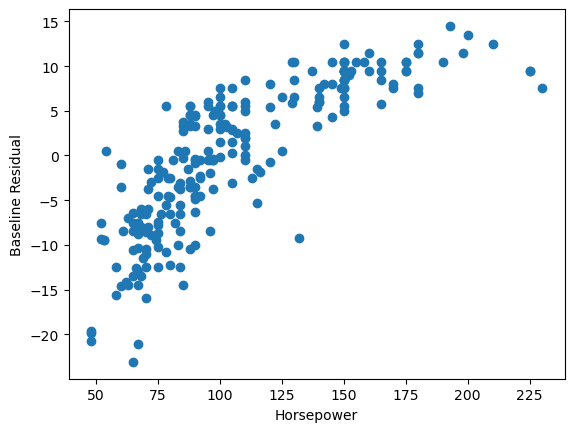

In [83]:
plt.scatter(preds['horsepower'], preds['baseline_res'])
plt.xlabel('Horsepower')
plt.ylabel('Baseline Residual')
plt.show()

In [84]:
preds['yhat_res'] = preds['yhat'] - preds['mpg']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res
212,180.0,16.5,23.5,11.058302,7.0,-5.441698
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404
90,198.0,12.0,23.5,8.022807,11.5,-3.977193
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958


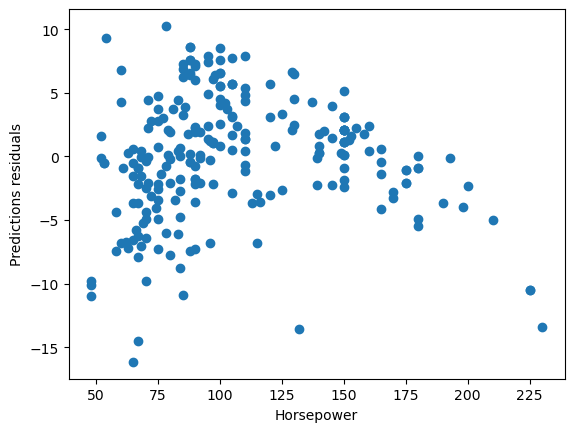

In [85]:
plt.scatter(preds['horsepower'], preds['yhat_res'])
plt.xlabel('Horsepower')
plt.ylabel('Predictions residuals')
plt.show()

## Compute SSE

SSE - Sum of Squared Errors

Also known as RSS - Residual Sum of Squares

Predicted minus actual, squared and summed

In [86]:
preds.columns

Index(['horsepower', 'mpg', 'baseline_preds', 'yhat', 'baseline_res',
       'yhat_res'],
      dtype='object')

In [87]:
preds['baseline_res_squared'] = preds['baseline_res'] ** 2
preds['yhat_res_squared'] = preds['yhat_res'] ** 2
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323


In [88]:
sse_baseline = preds['baseline_res_squared'].sum()
sse_yhat = preds['yhat_res_squared'].sum()
sse_baseline, sse_yhat

(15330.830000000002, 5355.469277811718)

## Compute MSE

MSE - Mean Squared Error

Divide the SSE by the total number of data points

In [89]:
mse_baseline = sse_baseline/len(preds)
mse_yhat = sse_yhat/len(preds)

mse_baseline, mse_yhat

(65.23757446808511, 22.789230969411566)

## Compute RMSE

RMSE - Root Mean Squared Error

Take the square root of the MSE

In [90]:
rmse_baseline = sqrt(mse_baseline)
rmse_yhat = sqrt(mse_yhat)

rmse_baseline, rmse_yhat

(8.076978052965423, 4.773806758700185)

## Doint it all with the sklearn library

mean_squared_error

In [91]:
preds.columns

Index(['horsepower', 'mpg', 'baseline_preds', 'yhat', 'baseline_res',
       'yhat_res', 'baseline_res_squared', 'yhat_res_squared'],
      dtype='object')

In [92]:
sqrt(mean_squared_error(preds['mpg'], preds['baseline_preds']))

8.076978052965423

In [93]:
sqrt(mean_squared_error(preds['mpg'], preds['yhat']))

4.773806758700185

In [94]:
mean_squared_error(preds['yhat'], preds['mpg'], squared=False)

4.773806758700185

## Model significance

Calculating the R^2 value by hand

R^2 = ESS / TSS

## Compute ESS

ESS - Explained Sum of Squares

Prediction minus mean of actual values, squared and summed

In [95]:
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323


In [96]:
preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081,-12.441698
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574,6.614463
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236,9.818596
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065,-15.477193
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323,9.144042


In [97]:
preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081,-12.441698,154.795859
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574,6.614463,43.751116
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236,9.818596,96.404826
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065,-15.477193,239.543505
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323,9.144042,83.613496


In [98]:
ess_baseline = 0
ess_yhat = preds['yhat_mean_res_squared'].sum()
ess_yhat

9975.360722188278

## Compute TSS

TSS - Total Sum of Squares

ESS + SSE

In [99]:
tss_baseline = sse_baseline + ess_baseline

In [100]:
tss_yhat = sse_yhat + ess_yhat

## Putting it all together

In [101]:
ess_baseline / tss_baseline

0.0

In [102]:
ess_yhat / tss_yhat

0.6506732330988134

## Using the sklearn library instead

explained_variance_score

In [103]:
explained_variance_score(preds['mpg'], preds['yhat'])

0.6506731545601601

# Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

- Load your zillow dataset.
- Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [104]:
from wrangle import wrangle_zillow
from prepare import remove_outliers

In [144]:
df = wrangle_zillow()

In [145]:
df, var_fences = remove_outliers(df)
df.head()

fips column ignored


,bed,bath,sqft,tax_value,year,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0


In [146]:
train, val, test = train_val_test(df)
train.shape, val.shape, test.shape

((1128033, 7), (376011, 7), (376011, 7))

In [147]:
preds = train[['sqft', 'tax_value']]
preds.head()

,sqft,tax_value
756336,1592.0,346902.0
1095910,1588.0,354034.0
106772,1642.0,650127.0
1196814,1237.0,216472.0
1671272,1158.0,267315.0


In [109]:
preds['baseline_preds'] = round(train['tax_value'].mean(), 2)
preds.head()

,sqft,tax_value,baseline_preds
756336,1592.0,346902.0,343398.91
1095910,1588.0,354034.0,343398.91
106772,1642.0,650127.0,343398.91
1196814,1237.0,216472.0,343398.91
1671272,1158.0,267315.0,343398.91


In [110]:
model = LinearRegression().fit(train[['sqft']], train[['tax_value']])
preds['yhat']= model.predict(train[['sqft']])

In [111]:
preds.head()

,sqft,tax_value,baseline_preds,yhat
756336,1592.0,346902.0,343398.91,327979.602974
1095910,1588.0,354034.0,343398.91,327318.403305
106772,1642.0,650127.0,343398.91,336244.598828
1196814,1237.0,216472.0,343398.91,269298.132411
1671272,1158.0,267315.0,343398.91,256239.438961


In [112]:
preds['baseline_res'] = preds['baseline_preds'] - preds['tax_value']
preds.head()

,sqft,tax_value,baseline_preds,yhat,baseline_res
756336,1592.0,346902.0,343398.91,327979.602974,-3503.09
1095910,1588.0,354034.0,343398.91,327318.403305,-10635.09
106772,1642.0,650127.0,343398.91,336244.598828,-306728.09
1196814,1237.0,216472.0,343398.91,269298.132411,126926.91
1671272,1158.0,267315.0,343398.91,256239.438961,76083.91


In [113]:
preds['yhat_res'] = preds['yhat'] - preds['tax_value']
preds.head()

,sqft,tax_value,baseline_preds,yhat,baseline_res,yhat_res
756336,1592.0,346902.0,343398.91,327979.602974,-3503.09,-18922.397026
1095910,1588.0,354034.0,343398.91,327318.403305,-10635.09,-26715.596695
106772,1642.0,650127.0,343398.91,336244.598828,-306728.09,-313882.401172
1196814,1237.0,216472.0,343398.91,269298.132411,126926.91,52826.132411
1671272,1158.0,267315.0,343398.91,256239.438961,76083.91,-11075.561039


## Plot the residuals for the linear regression model that you made.


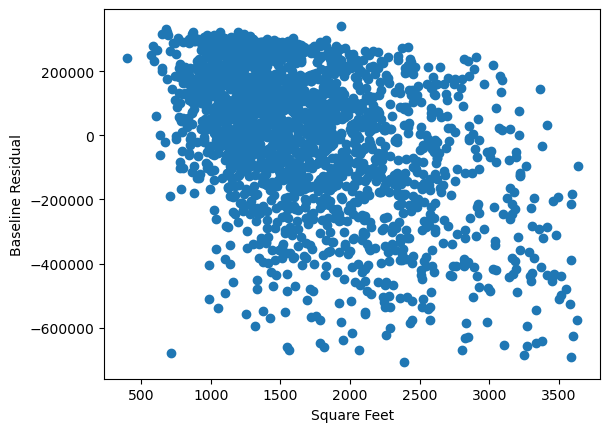

In [114]:
plt.scatter(x='sqft', y='baseline_res', data=preds.sample(2000))
plt.xlabel('Square Feet')
plt.ylabel('Baseline Residual')
plt.show()

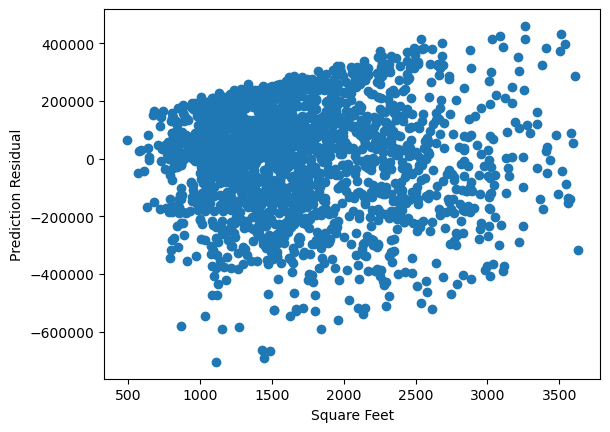

In [115]:
plt.scatter(x='sqft', y='yhat_res', data=preds.sample(2000))
plt.xlabel('Square Feet')
plt.ylabel('Prediction Residual')
plt.show()

## Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.  
## Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [116]:
preds['baseline_res_squared'] = preds['baseline_res'] ** 2
preds['yhat_res_squared'] = preds['yhat_res'] ** 2
preds.head()

,sqft,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
756336,1592.0,346902.0,343398.91,327979.602974,-3503.09,-18922.397026,1.227164e+07,3.580571e+08
1095910,1588.0,354034.0,343398.91,327318.403305,-10635.09,-26715.596695,1.131051e+08,7.137231e+08
106772,1642.0,650127.0,343398.91,336244.598828,-306728.09,-313882.401172,9.408212e+10,9.852216e+10
1196814,1237.0,216472.0,343398.91,269298.132411,126926.91,52826.132411,1.611044e+10,2.790600e+09
1671272,1158.0,267315.0,343398.91,256239.438961,76083.91,-11075.561039,5.788761e+09,1.226681e+08


In [117]:
sse_baseline = preds['baseline_res_squared'].sum()
sse_yhat = preds['yhat_res_squared'].sum()
sse_baseline, sse_yhat

(5.2468605437470056e+16, 4.154078904837569e+16)

In [118]:
mse_baseline = sse_baseline/len(preds)
mse_yhat = sse_yhat/len(preds)

mse_baseline, mse_yhat

(46513360369.30662, 36825863293.33955)

In [119]:
rmse_baseline = sqrt(mse_baseline)
rmse_yhat = sqrt(mse_yhat)

rmse_baseline, rmse_yhat

(215669.56291815176, 191900.65996066702)

## Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.


In [120]:
preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
preds.head()

,sqft,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res
756336,1592.0,346902.0,343398.91,327979.602974,-3503.09,-18922.397026,1.227164e+07,3.580571e+08,-15419.307026
1095910,1588.0,354034.0,343398.91,327318.403305,-10635.09,-26715.596695,1.131051e+08,7.137231e+08,-16080.506695
106772,1642.0,650127.0,343398.91,336244.598828,-306728.09,-313882.401172,9.408212e+10,9.852216e+10,-7154.311172
1196814,1237.0,216472.0,343398.91,269298.132411,126926.91,52826.132411,1.611044e+10,2.790600e+09,-74100.777589
1671272,1158.0,267315.0,343398.91,256239.438961,76083.91,-11075.561039,5.788761e+09,1.226681e+08,-87159.471039


In [121]:
preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
preds.head()

,sqft,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
756336,1592.0,346902.0,343398.91,327979.602974,-3503.09,-18922.397026,1.227164e+07,3.580571e+08,-15419.307026,2.377550e+08
1095910,1588.0,354034.0,343398.91,327318.403305,-10635.09,-26715.596695,1.131051e+08,7.137231e+08,-16080.506695,2.585827e+08
106772,1642.0,650127.0,343398.91,336244.598828,-306728.09,-313882.401172,9.408212e+10,9.852216e+10,-7154.311172,5.118417e+07
1196814,1237.0,216472.0,343398.91,269298.132411,126926.91,52826.132411,1.611044e+10,2.790600e+09,-74100.777589,5.490925e+09
1671272,1158.0,267315.0,343398.91,256239.438961,76083.91,-11075.561039,5.788761e+09,1.226681e+08,-87159.471039,7.596773e+09


In [122]:
ess_baseline = 0
ess_yhat = preds['yhat_mean_res_squared'].sum()
ess_yhat

1.09278163891029e+16

In [123]:
tss_baseline = sse_baseline + ess_baseline

In [124]:
tss_yhat = sse_yhat + ess_yhat

In [125]:
ess_baseline / tss_baseline

0.0

In [126]:
variance = ess_yhat / tss_yhat

## What is the amount of variance explained in your model?


In [127]:
variance

0.2082734293772006

## Is your model better than the baseline model?


In [128]:
print(rmse_baseline)
print(rmse_yhat)

215669.56291815176
191900.65996066702


**yes my model is better**

- Create a file named evaluate.py that contains the following functions.
 - plot_residuals(y, yhat): creates a residual plot
 - regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
 - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
 - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [129]:
def plot_residuals(df, y, yhat):
    plt.scatter(x=y, y=yhat, data=df.sample(2000))
    plt.xlabel(y)
    plt.ylabel(yhat)
    plt.show()

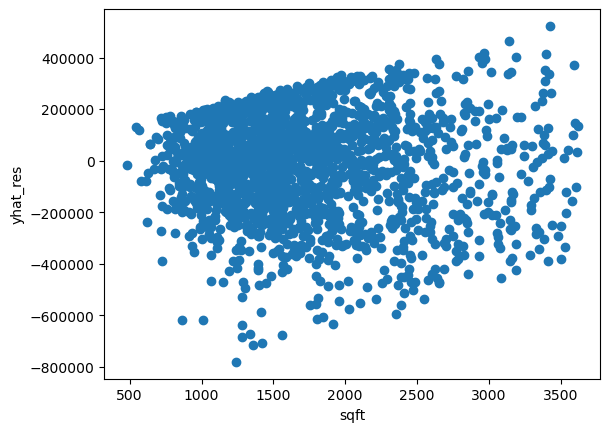

In [130]:
plot_residuals(preds, 'sqft', 'yhat_res')

In [131]:
def regression_errors(df, target, feature, pred_table=False):
    
    '''
    This function takes a dataframe, the target variable and the feature(s). It determines the baseline
    for the data. It then fits a LinearRegression model to the data and determines the SSE, MSE, RMSE,
    ESS, TSS and R^2. It returns all of the metrics in a data frame.
    '''
    
    # creating a preds data frame and determining the baseline predictions
    preds = df[feature]
    preds[target] = df[[target]]
    preds['baseline_preds'] = round(train[target].mean(), 2)
    
    # creating and fitting to a LinearRegression model then making predictions from the model
    model = LinearRegression().fit(train[feature], train[[target]])
    preds['yhat']= model.predict(train[feature])
    
    # determining the residuals of the baseline and predictions
    preds['baseline_res'] = preds['baseline_preds'] - preds[target]
    preds['yhat_res'] = preds['yhat'] - preds[target]
    
    # squaring the residuals
    preds['baseline_res_squared'] = preds['baseline_res'] ** 2
    preds['yhat_res_squared'] = preds['yhat_res'] ** 2
    
    # summing the squared residuals to get the SSE
    sse_baseline = preds['baseline_res_squared'].sum()
    sse_yhat = preds['yhat_res_squared'].sum()
    
    # dividing summed residuals by the number of predicitons to get the MSE
    mse_baseline = sse_baseline/len(preds)
    mse_yhat = sse_yhat/len(preds)
    
    # square rooting the MSE to get the RMSE
    rmse_baseline = sqrt(mse_baseline)
    rmse_yhat = sqrt(mse_yhat)
    
    # subtracting the baseline predictions from the predictions made by the model then squaring them
    preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
    preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
    
    # summing the squared predictions to get the ESS
    ess_baseline = 0
    ess_yhat = preds['yhat_mean_res_squared'].sum()
    
    # adding the SSE and ESS to get the TSS
    tss_baseline = sse_baseline + ess_baseline
    tss_yhat = sse_yhat + ess_yhat
    
    # creating a DataFrame of the types of metrics
    metrics = pd.DataFrame(np.array(['SSE','MSE','RMSE','ESS','TSS', 'R^2']), columns=['metric'])
    
    # add the metrics determined to the DataFrame
    metrics['baseline'] = [sse_baseline, mse_baseline, rmse_baseline, 
                      ess_baseline, tss_baseline, (ess_baseline/tss_baseline)]
    metrics['yhat'] = [sse_yhat, mse_yhat, rmse_yhat, ess_yhat, 
                  tss_yhat, (ess_yhat/tss_yhat)]
    
    # returning the DataFrame
    if pred_table == True:
        return metrics, preds
    else:
        return metrics



In [132]:
regression_errors(train, 'tax_value', ['sqft'])

,metric,baseline,yhat
0,SSE,5.246861e+16,4.154079e+16
1,MSE,4.651336e+10,3.682586e+10
2,RMSE,2.156696e+05,1.919007e+05
3,ESS,0.000000e+00,1.092782e+16
4,TSS,5.246861e+16,5.246861e+16
5,R^2,0.000000e+00,2.082734e-01


In [133]:
def better_than_baseline(preds, target):
    baseline = mean_squared_error(preds[target], preds['baseline_preds'], squared=False)
    model = mean_squared_error(preds[target], preds['yhat'], squared=False)
    diff = baseline - model
    
    if diff > 0:
        return True
    else: 
        return False
    

In [134]:
better_than_baseline(preds, 'tax_value')

True

- Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.
- Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [135]:
from pydataset import data

In [136]:
df = pd.DataFrame(data('tips'))

In [137]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [138]:
train, val, split = train_val_test(df)

In [139]:
regression_errors(train, 'tip', ['total_bill'])

,metric,baseline,yhat
0,SSE,332.786500,175.272908
1,MSE,2.279360,1.200499
2,RMSE,1.509755,1.095673
3,ESS,0.000000,157.513592
4,TSS,332.786500,332.786500
5,R^2,0.000000,0.473317


In [140]:
df = pd.DataFrame(data('mpg'))
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [141]:
train, val, test = train_val_test(df)

In [142]:
metrics, preds = regression_errors(train, 'hwy', ['displ'], True)
metrics

,metric,baseline,yhat
0,SSE,5141.686000,2148.209197
1,MSE,36.726329,15.344351
2,RMSE,6.060225,3.917187
3,ESS,0.000000,2993.476803
4,TSS,5141.686000,5141.686000
5,R^2,0.000000,0.582198


**The Linear Regression model is better than the baseline for both the tips dataset and the mpg dataset**

In [143]:
preds.head()

,displ,hwy,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
42,3.3,24,23.73,24.002384,-0.27,0.002384,0.0729,0.000006,0.272384,0.074193
102,1.6,32,23.73,30.036413,-8.27,-1.963587,68.3929,3.855674,6.306413,39.770846
143,2.4,27,23.73,27.196870,-3.27,0.196870,10.6929,0.038758,3.466870,12.019189
79,4.0,19,23.73,21.517784,4.73,2.517784,22.3729,6.339239,-2.212216,4.893898
138,4.0,17,23.73,21.517784,6.73,4.517784,45.2929,20.410377,-2.212216,4.893898


In [148]:
train.columns

Index(['bed', 'bath', 'sqft', 'tax_value', 'year', 'taxamount', 'fips'], dtype='object')

In [176]:
metrics, preds = regression_errors(train, 'tax_value', ['sqft','bed','bath','year'], True)

In [177]:
metrics

,metric,baseline,yhat
0,SSE,5.246861e+16,4.099325e+16
1,MSE,4.651336e+10,3.634047e+10
2,RMSE,2.156696e+05,1.906318e+05
3,ESS,0.000000e+00,1.147536e+16
4,TSS,5.246861e+16,5.246861e+16
5,R^2,0.000000e+00,2.187091e-01


In [178]:
preds.head()

,sqft,bed,bath,year,tax_value,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
756336,1592.0,4.0,2.0,1948.0,346902.0,343398.91,297158.389640,-3503.09,-49743.610360,1.227164e+07,2.474427e+09,-46240.520360,2.138186e+09
1095910,1588.0,3.0,2.0,1958.0,354034.0,343398.91,332219.559711,-10635.09,-21814.440289,1.131051e+08,4.758698e+08,-11179.350289,1.249779e+08
106772,1642.0,3.0,2.0,1973.0,650127.0,343398.91,346199.082734,-306728.09,-303927.917266,9.408212e+10,9.237218e+10,2800.172734,7.840967e+06
1196814,1237.0,2.0,1.0,1942.0,216472.0,343398.91,276308.841312,126926.91,59836.841312,1.611044e+10,3.580448e+09,-67090.068688,4.501077e+09
1671272,1158.0,3.0,2.0,1932.0,267315.0,343398.91,254145.786243,76083.91,-13169.213757,5.788761e+09,1.734282e+08,-89253.123757,7.966120e+09
